## Image similarity clustering

In [82]:
import os, sys
import datetime
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [67]:
PATH='../input/merged_data/'

In [68]:
#for image-similarity-clustering we need a tab delimited csv of file names
cluster_names = [f for f in listdir('plots/clustering/') if isfile(join('plots/clustering/', f))]

In [69]:
d={}
for n in cluster_names:
    id = n.split('.')[0]
    d[id] = n

In [70]:
image_df = pd.DataFrame(list(d.items()), columns=['id', 'image'])

In [71]:
image_df.head()

,id,image
0,MAC002736,MAC002736.png
1,MAC003323,MAC003323.png
2,MAC002043,MAC002043.png
3,MAC000638,MAC000638.png
4,MAC000100,MAC000100.png


In [72]:
image_df.to_csv('{0}clustering_image_df.csv'.format(PATH), sep='\t')

Now run image-similarity-clustering scripts, then run cells below

In [73]:
tsne_data = pd.read_csv('{0}clustering_image_df_features_tsne.tsv'.format(PATH), sep='\t')

In [74]:
tsne_data.head()

,id,x,y
0,MAC002736,15.200250,4.501566
1,MAC003323,7.410511,15.960701
2,MAC002043,-11.768622,2.007271
3,MAC000638,-16.444752,3.477478
4,MAC000100,-17.094715,-8.293603


In [75]:
x = tsne_data['x']

In [76]:
y = tsne_data['y']

In [77]:
c = tsne_data['id']

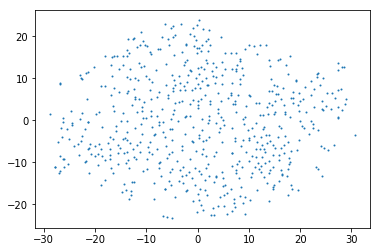

In [78]:
plt.scatter(x, y, s=1)

TODO, test different parameters for TSNE algo to see effect on groupings

Lets look at the 'cluster' in the centre top

In [83]:
sector_1 = tsne_data.loc[(tsne_data['x'] > -2) & ( tsne_data['x'] < 5) & ( tsne_data['y'] > 15)]

In [84]:
#show the similarly clusterd households

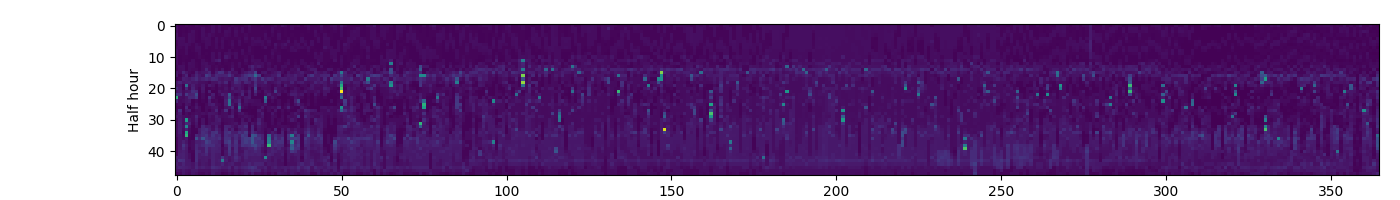

MAC005102


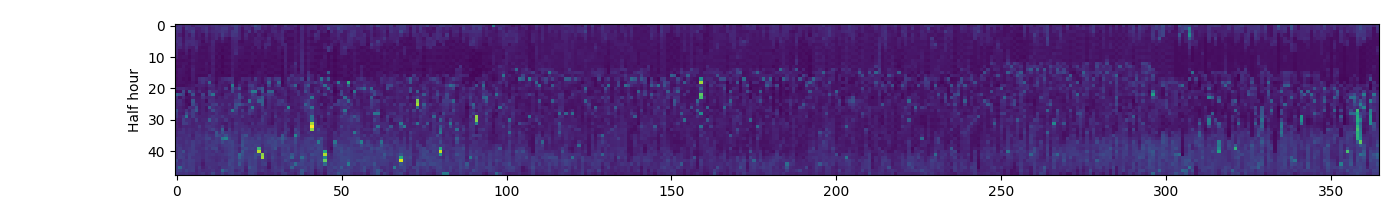

MAC001468


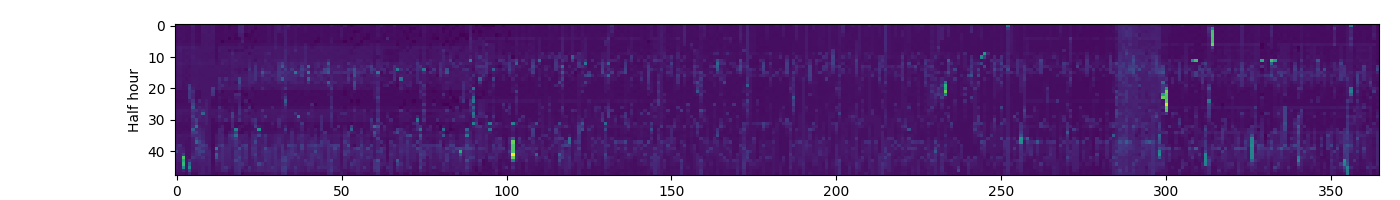

MAC002608


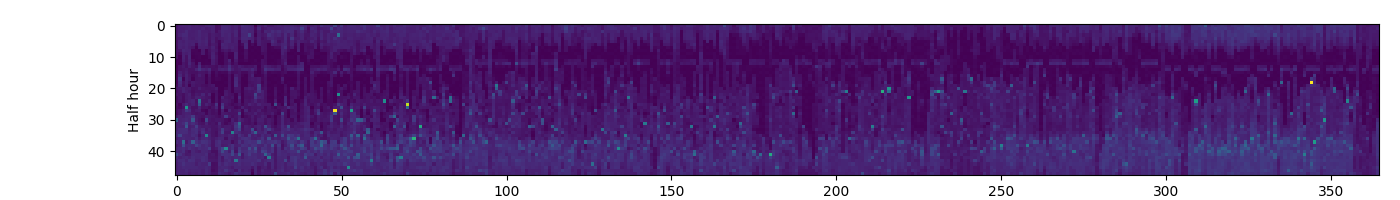

MAC002369


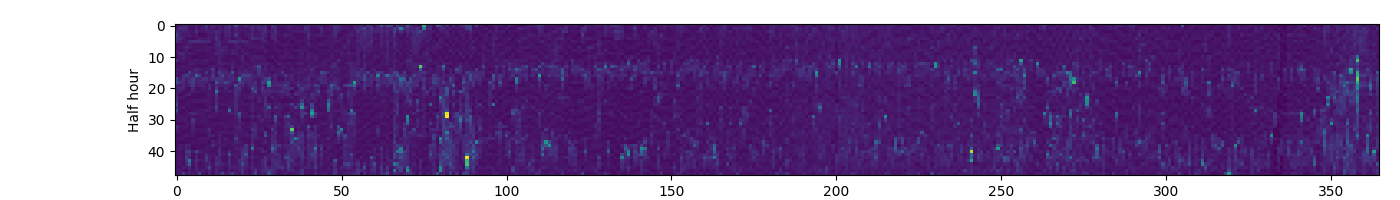

MAC001519


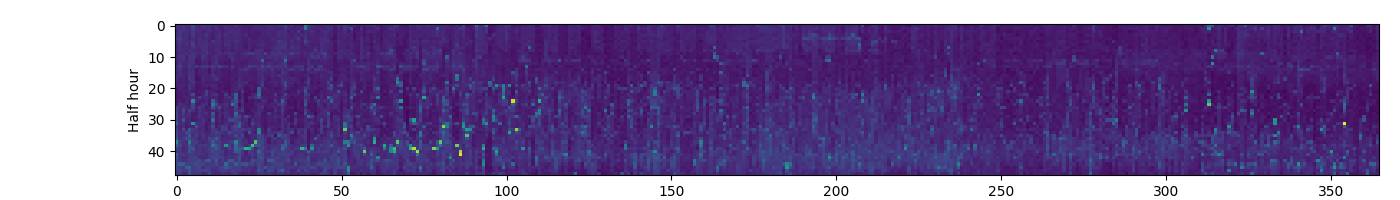

MAC002600


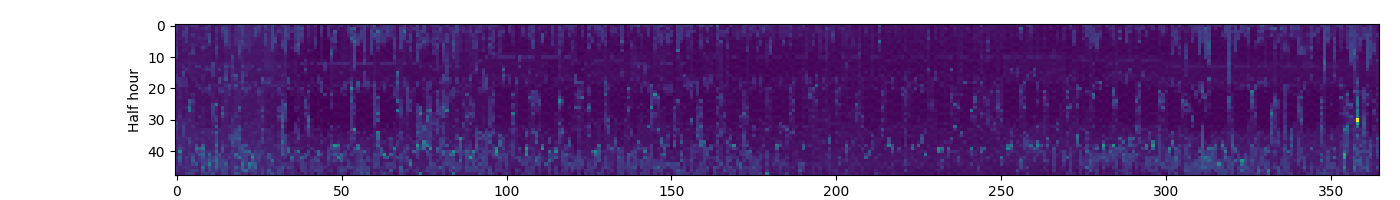

MAC000381


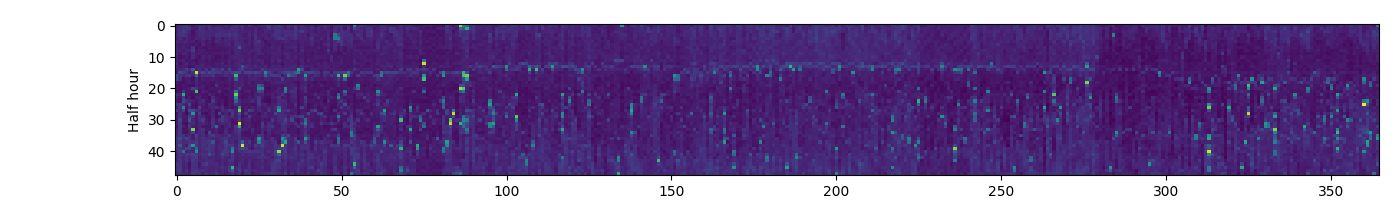

MAC002983


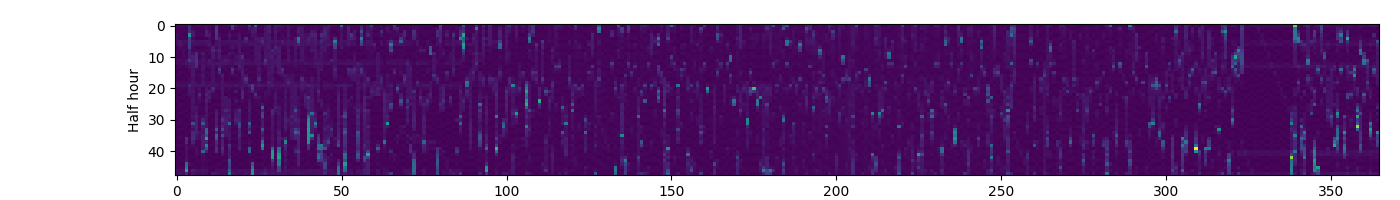

MAC004236


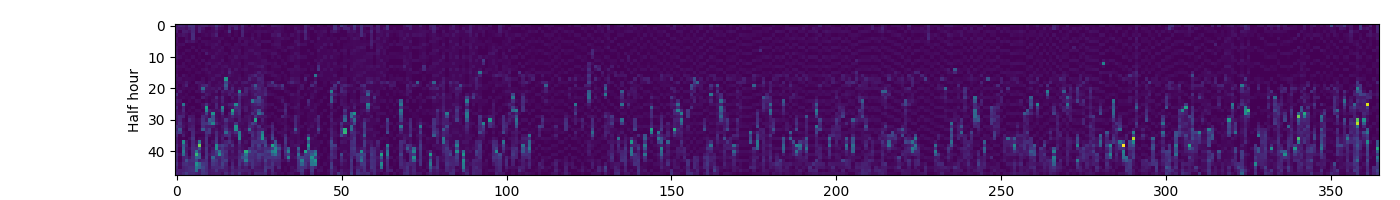

MAC005266


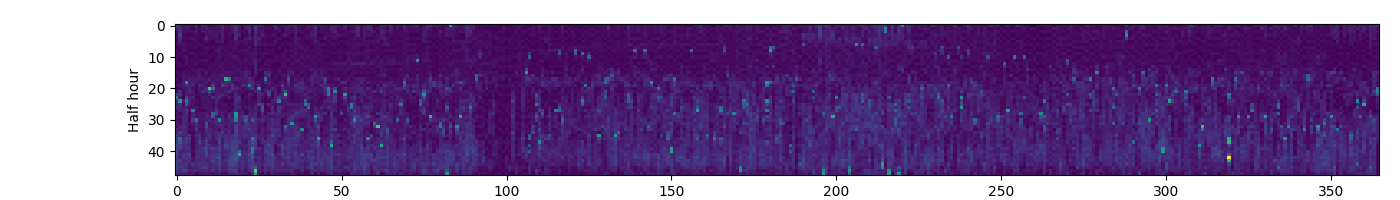

MAC005170


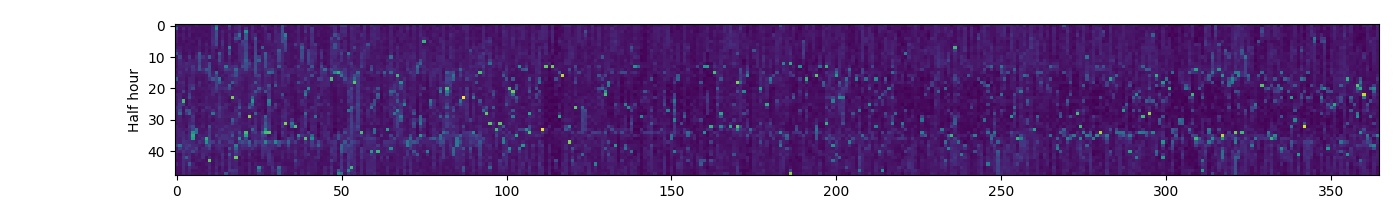

MAC002723


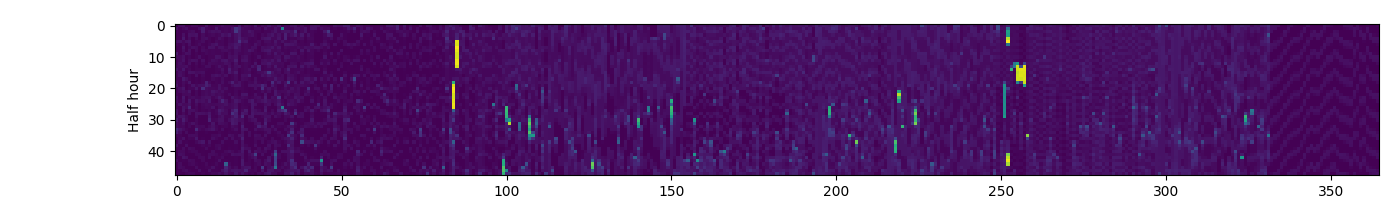

MAC004915


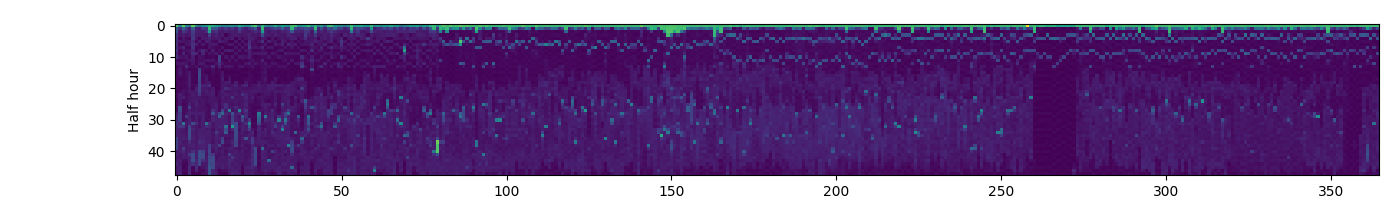

MAC000350


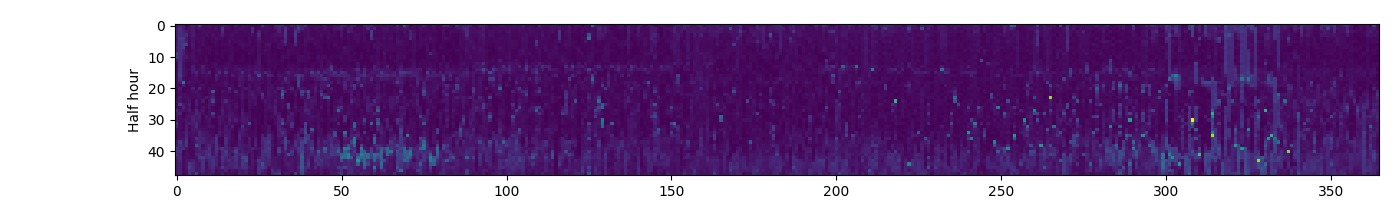

MAC003034


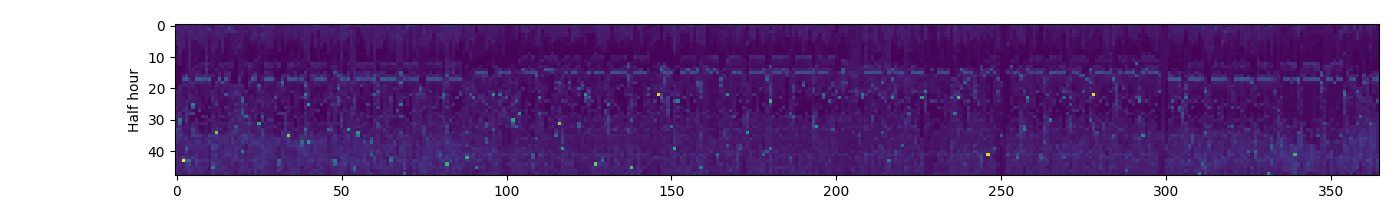

MAC001620


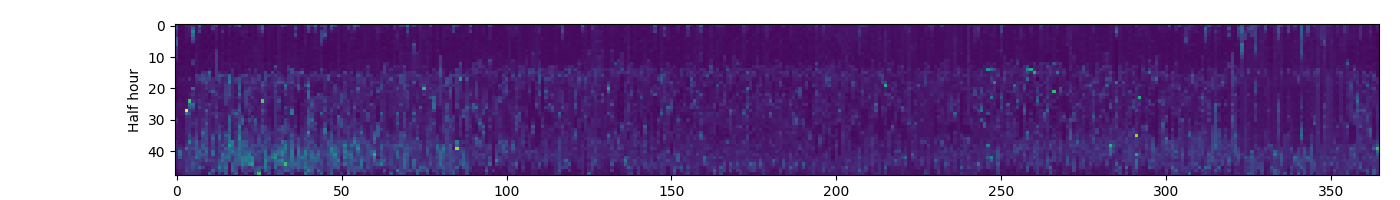

MAC004224


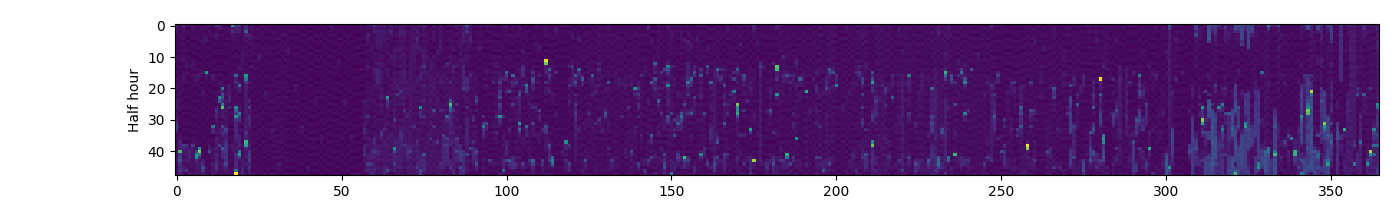

MAC005187


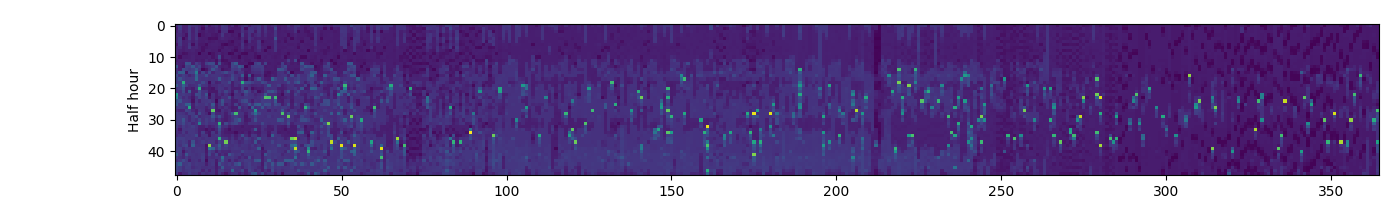

MAC001072


In [85]:
from IPython.display import Image, display
for id in sector_1['id']:
    display(Image(filename='plots/clustering/{0}.png'.format(id)))
    print(id)

Now another area

In [86]:
sector_2 = tsne_data.loc[(tsne_data['x'] < -25) & ( tsne_data['y'] < -7)]

In [87]:
#show the similarly clusterd households

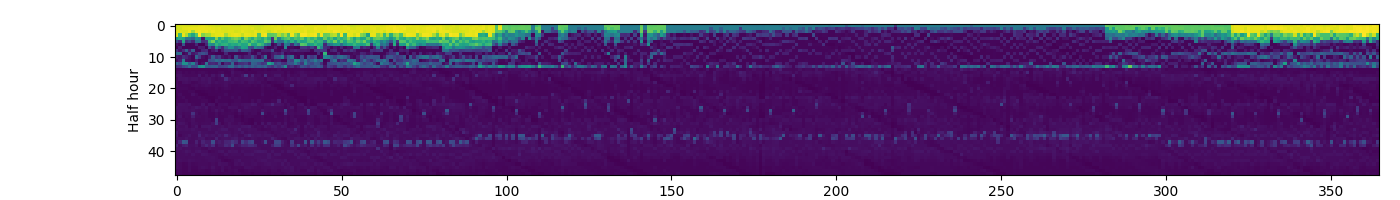

MAC000331


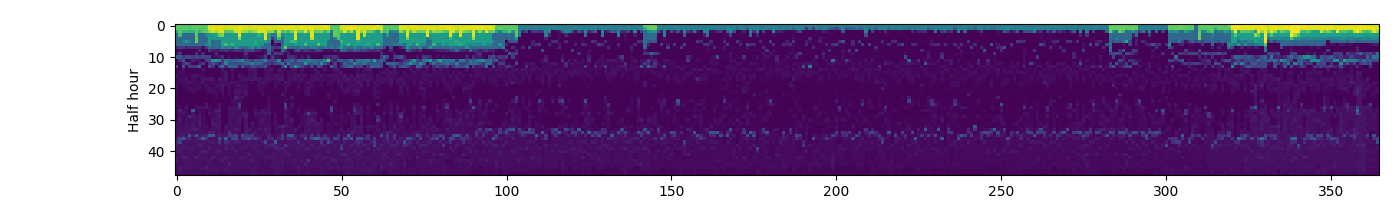

MAC000415


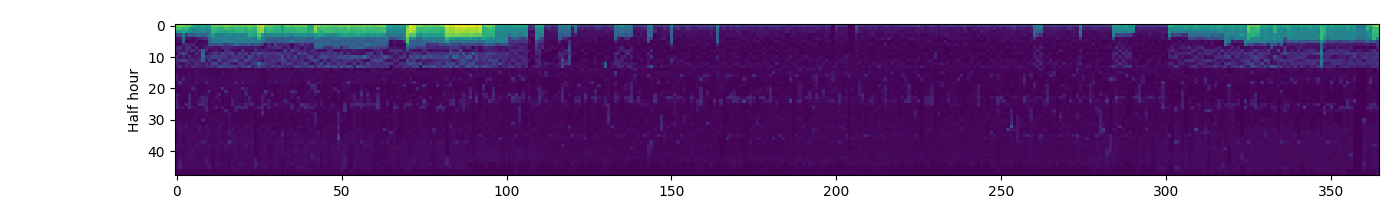

MAC004903


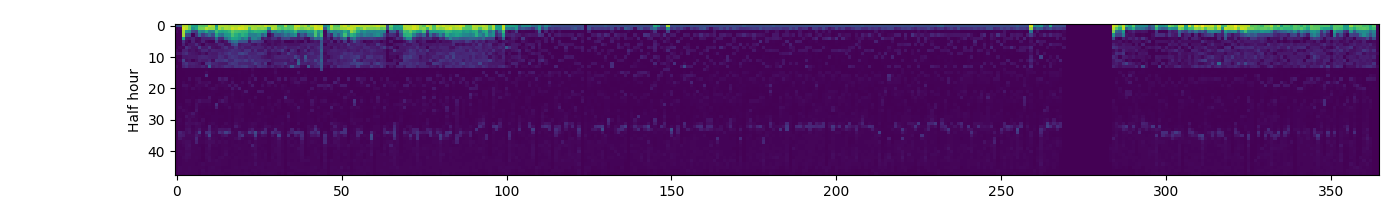

MAC004983


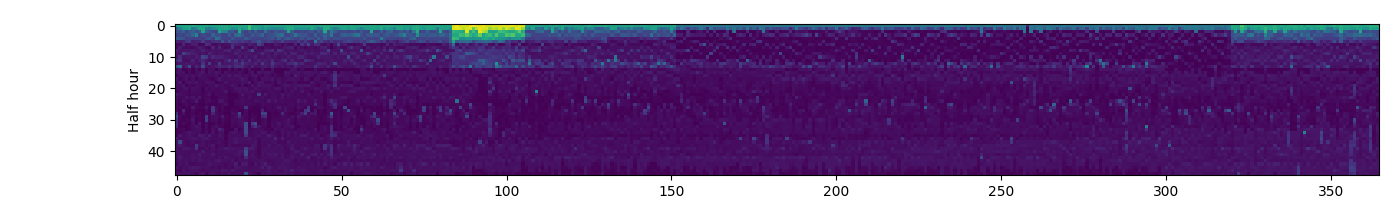

MAC004980


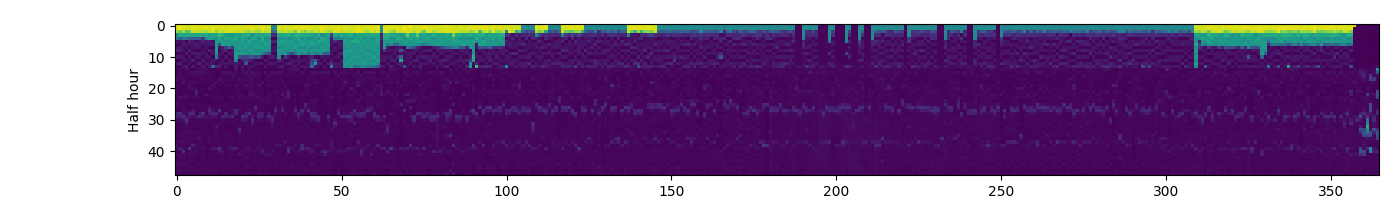

MAC005386


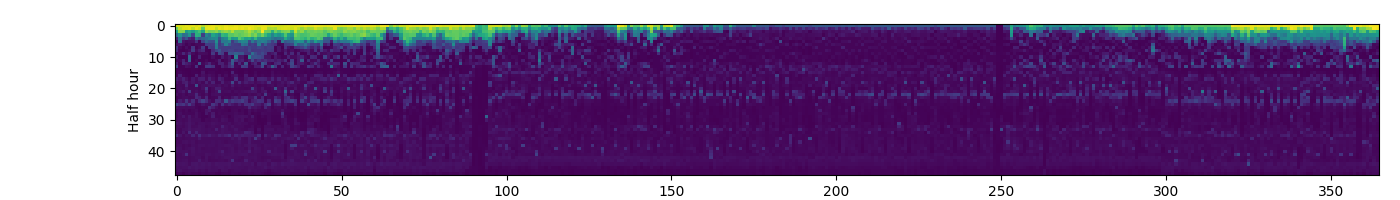

MAC004902


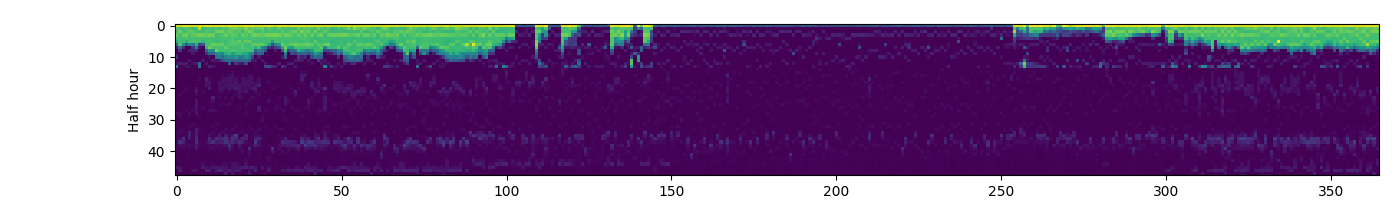

MAC004954


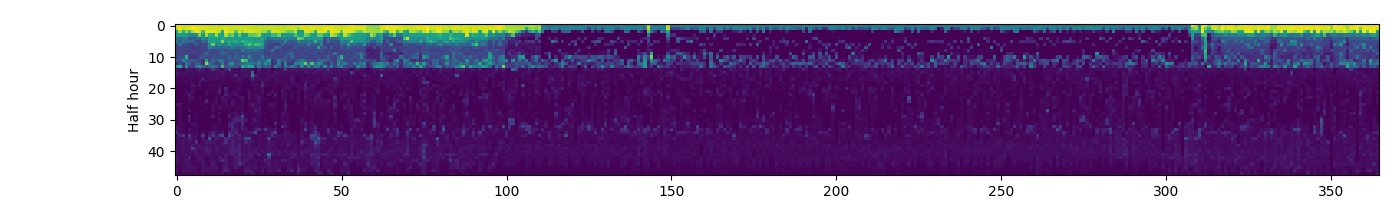

MAC005216


In [88]:

for id in sector_2['id']:
    display(Image(filename='plots/clustering/{0}.png'.format(id)))
    print(id)